In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

data_df = pd.DataFrame(pd.read_csv('gbm-data.csv'))
data_df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mass_data = data_df.values # Преобразовали таблицу в массив данных
print("Размер матрицы mass_data: ",npdata.shape)
# В первой колонке файла с данными записано, была или нет реакция. 
# Все остальные колонки (d1 - d1776) содержат различные характеристики
# молекулы, такие как размер, форма и т.д.

Размер матрицы npdata:  (3751, 1777)


In [122]:
# функции
def sdf(quality, y, y_pred):
    """Возвращает"""
    pass

def plot(test_loss, train_loss):
    %matplotlib inline
    plt.figure(figsize=(25, 20))
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    
    plt.legend(['test', 'train'])
    plt.show()
    
def get_loss(clf, X, y):
    loss = []
    # Используйте метод staged_decision_function для предсказания качества
    # на обучающей и тестовой выборке на каждой итерации.
    for y_pred in clf.staged_decision_function(X):
        # Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции
        # sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики
        #  и номер итерации, на которой оно достигается.
        loss.append(log_loss(y, 1.0 / (1.0 + np.exp(-y_pred))))

    min_iter = np.argmin(loss)
    min_loss = loss[min_iter]
    return loss, min_iter, min_loss

In [29]:
Y = mass_data.T[0]
X = mass_data.T[1:]
X = X.T
Y = Y.T
print("Y shape: ", Y.shape, "\nX shape: ",X.shape)

Y shape:  (3751,) 
X shape:  (3751, 1776)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                  test_size=0.8, 
                                                  random_state=241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

      Iter       Train Loss   Remaining Time 
         1           0.9690           17.67s
         2           0.8528           15.99s
         3           0.7524           15.39s
         4           0.6771           15.19s
         5           0.6290           14.74s
         6           0.5807           14.47s
         7           0.5498           14.19s
         8           0.5239           14.06s
         9           0.4873           13.92s
        10           0.4366           13.82s
        20           0.1943           13.05s
        30           0.1023           12.36s
        40           0.0666           11.75s
        50           0.0423           11.15s
        60           0.0287           10.55s
        70           0.0172           10.01s
        80           0.0108            9.49s
        90           0.0075            8.91s
       100           0.0049            8.38s
       200           0.0004            2.23s

 мин. значие метрики на тренировочных данных:
 0.0002

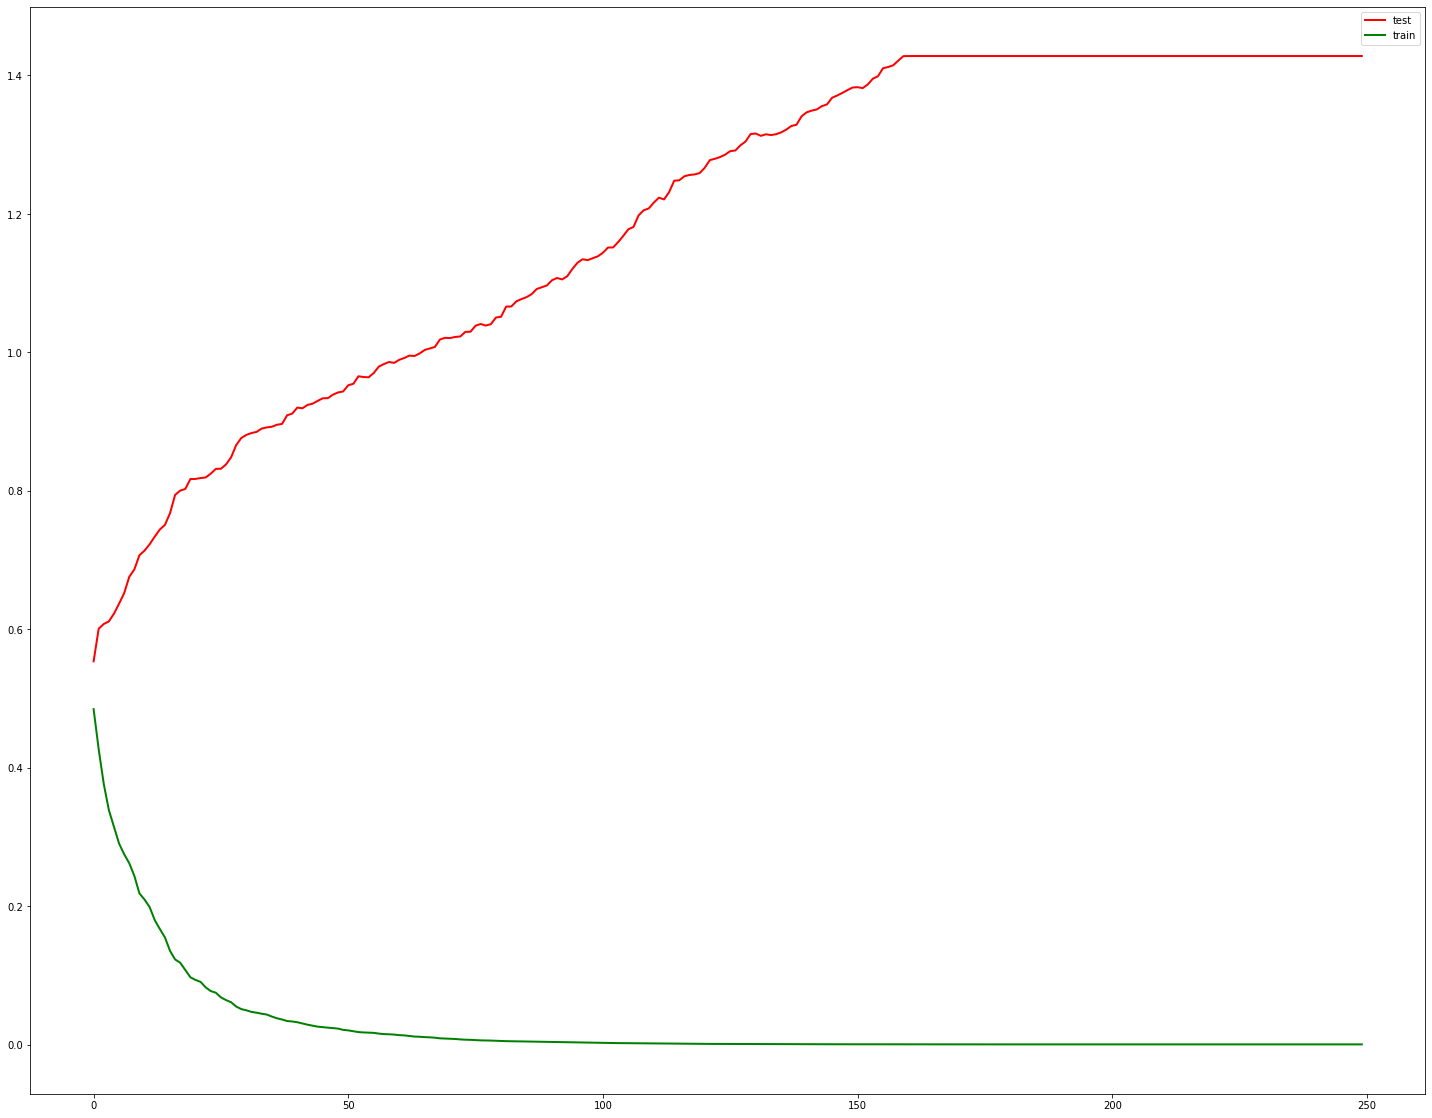

      Iter       Train Loss   Remaining Time 
         1           1.0856           15.68s
         2           0.9440           15.74s
         3           0.8699           15.06s
         4           0.8165           15.19s
         5           0.7753           14.89s
         6           0.7400           14.55s
         7           0.7001           14.54s
         8           0.6686           14.42s
         9           0.6438           14.19s
        10           0.6285           14.04s
        20           0.4258           13.14s
        30           0.2925           12.56s
        40           0.2053           11.88s
        50           0.1570           11.31s
        60           0.1154           10.76s
        70           0.0862           10.16s
        80           0.0673            9.60s
        90           0.0538            9.01s
       100           0.0416            8.45s
       200           0.0045            2.80s

 мин. значие метрики на тренировочных данных:
 0.0007

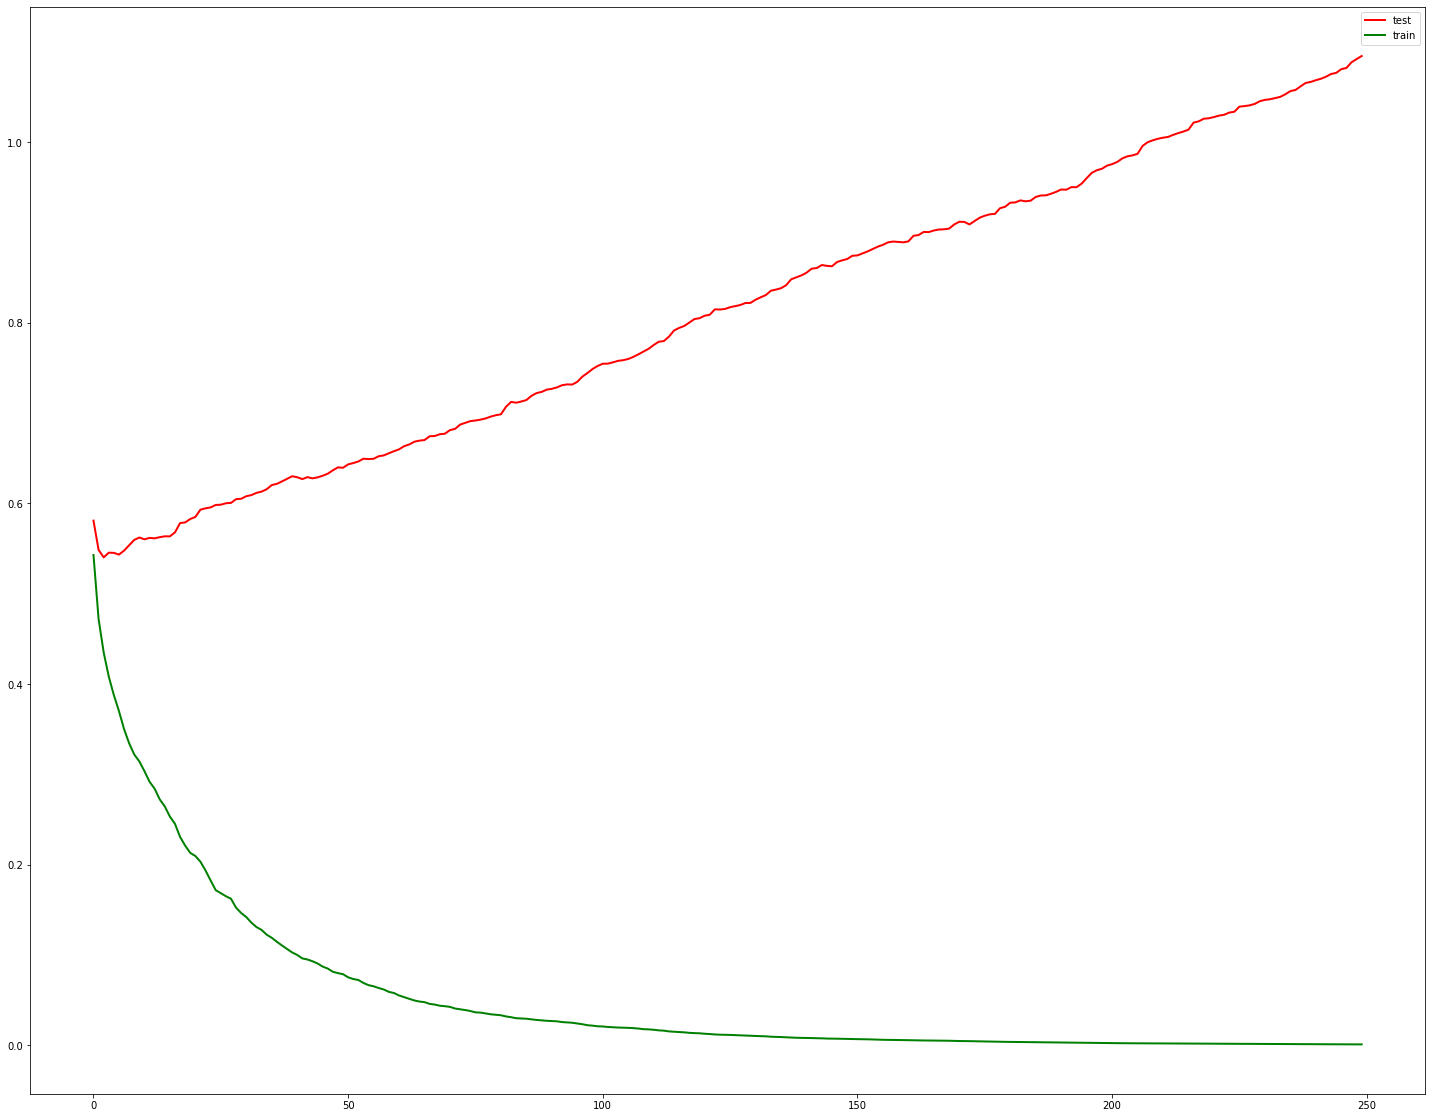

      Iter       Train Loss   Remaining Time 
         1           1.1774           15.93s
         2           1.0618           15.87s
         3           0.9819           15.89s
         4           0.9261           15.74s
         5           0.8858           15.68s
         6           0.8409           15.37s
         7           0.8084           15.10s
         8           0.7881           14.91s
         9           0.7541           14.99s
        10           0.7275           14.97s
        20           0.5526           13.72s
        30           0.4299           13.03s
        40           0.3382           12.30s
        50           0.2753           11.71s
        60           0.2272           11.05s
        70           0.1934           10.49s
        80           0.1619            9.85s
        90           0.1353            9.28s
       100           0.1172            8.71s
       200           0.0254            2.88s

 мин. значие метрики на тренировочных данных:
 0.0068

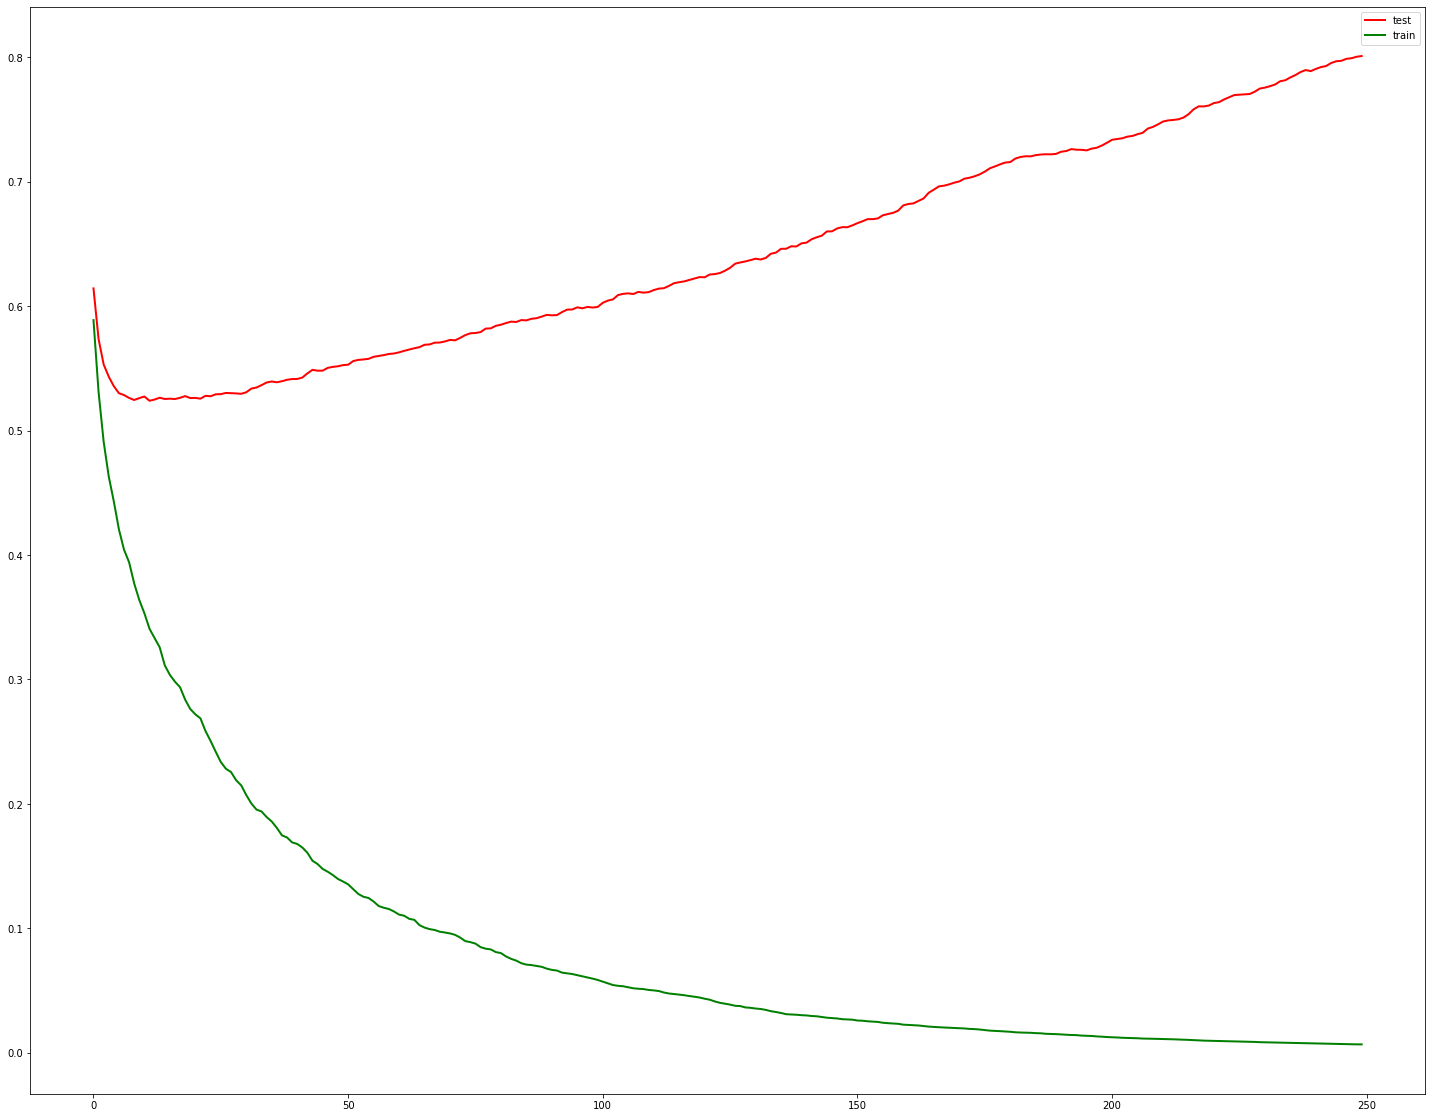

      Iter       Train Loss   Remaining Time 
         1           1.2342           15.93s
         2           1.1437           15.87s
         3           1.0702           15.97s
         4           1.0151           17.28s
         5           0.9690           17.14s
         6           0.9310           17.12s
         7           0.9027           17.18s
         8           0.8763           16.90s
         9           0.8468           16.68s
        10           0.8277           16.55s
        20           0.6795           14.65s
        30           0.5598           13.57s
        40           0.4749           12.67s
        50           0.4254           12.03s
        60           0.3724           11.24s
        70           0.3288           10.61s
        80           0.2843           10.01s
        90           0.2535            9.38s
       100           0.2265            8.79s
       200           0.0764            2.93s

 мин. значие метрики на тренировочных данных:
 0.0224

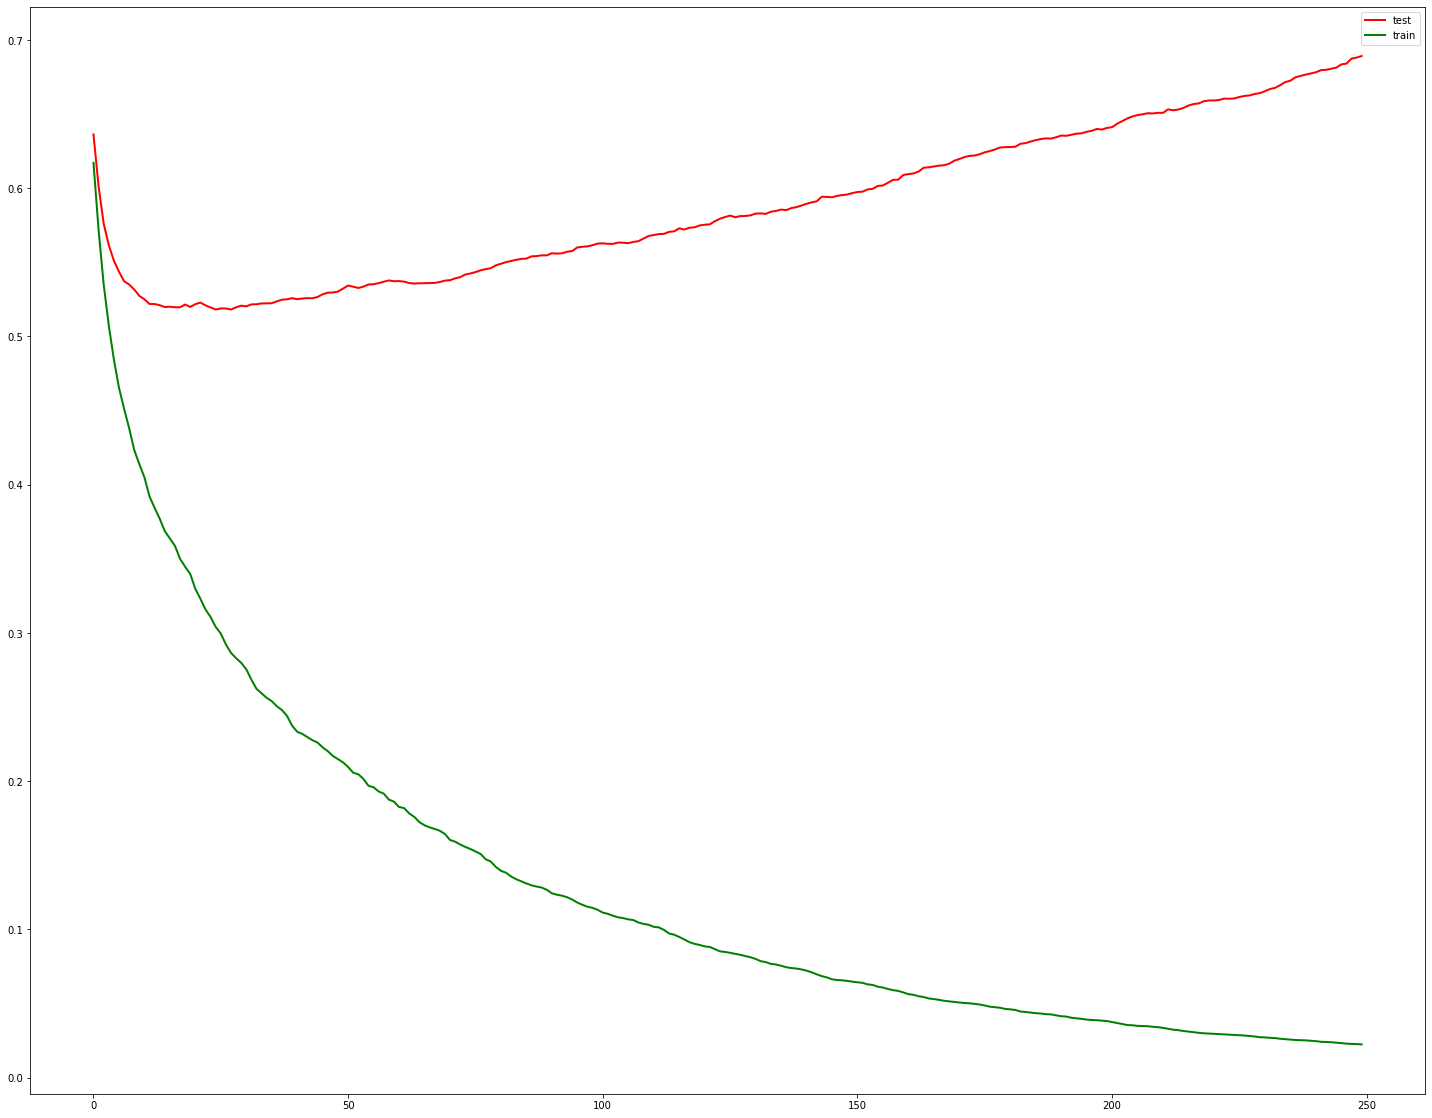

      Iter       Train Loss   Remaining Time 
         1           1.2986           15.68s
         2           1.2404           15.62s
         3           1.1909           15.72s
         4           1.1495           15.80s
         5           1.1102           15.87s
         6           1.0760           15.98s
         7           1.0455           16.21s
         8           1.0198           16.24s
         9           0.9975           16.09s
        10           0.9760           15.95s
        20           0.8233           14.75s
        30           0.7308           13.83s
        40           0.6610           13.07s
        50           0.5960           12.46s
        60           0.5437           11.77s
        70           0.5051           11.13s
        80           0.4692           10.40s
        90           0.4313            9.74s
       100           0.4017            9.13s
       200           0.2140            2.92s

 мин. значие метрики на тренировочных данных:
 0.0795

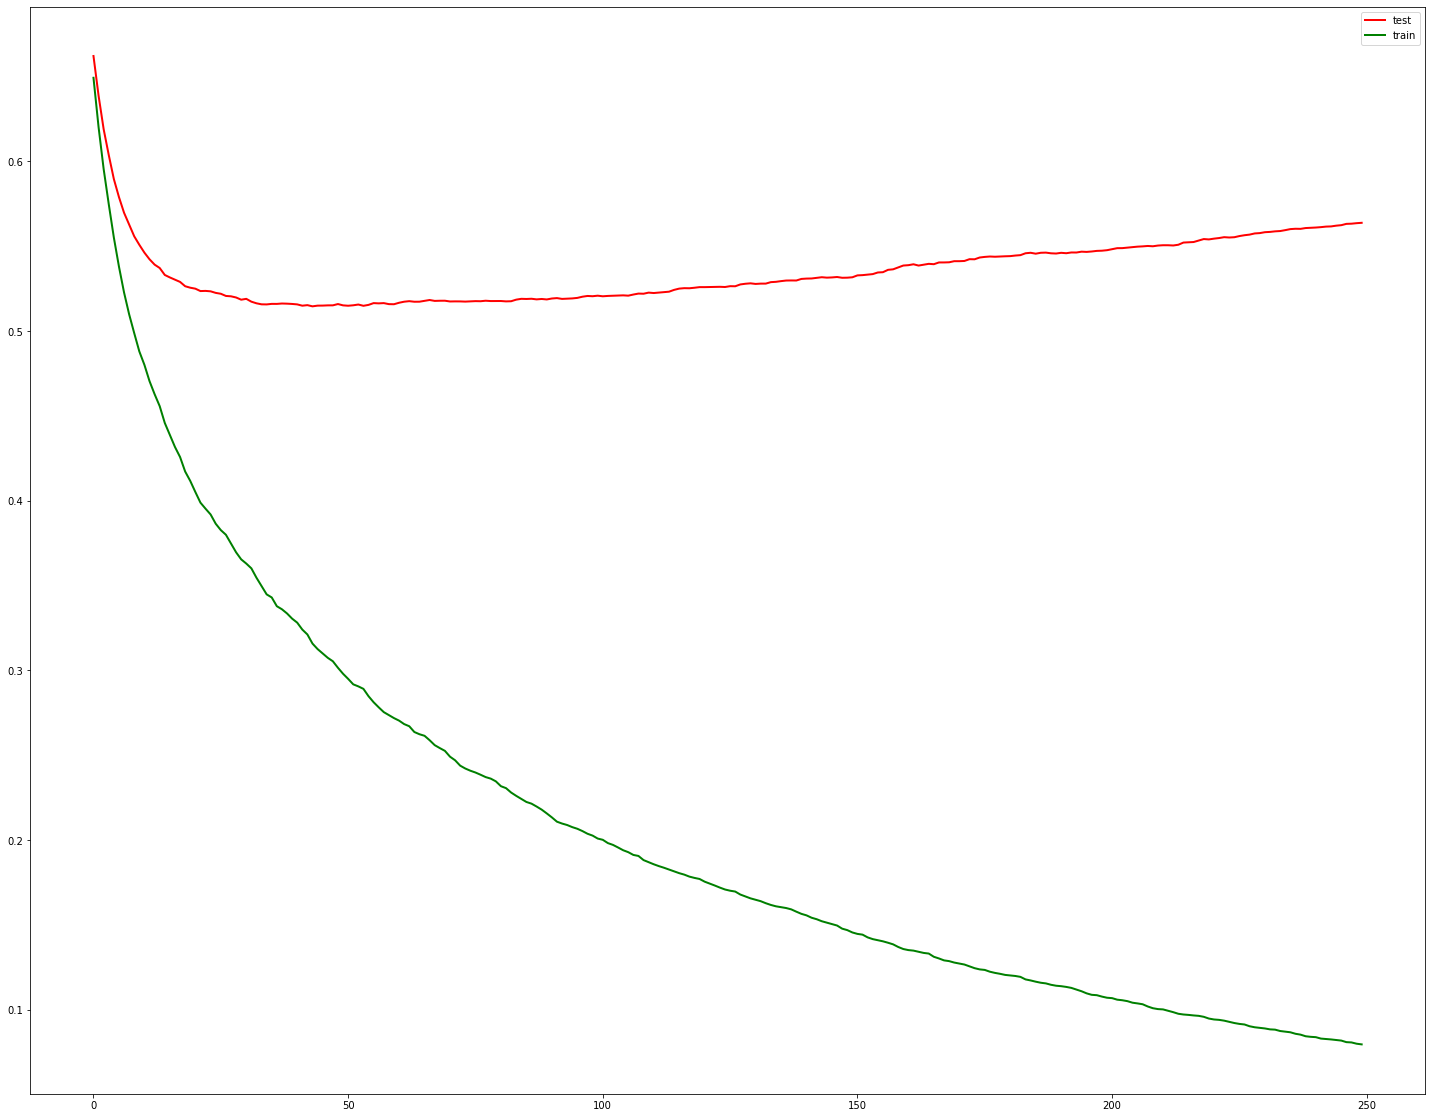

Wall time: 1min 12s


In [117]:
%%time
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
for lr in learning_rates:
    model = GBC(n_estimators=250, verbose=True, random_state=241, 
                learning_rate=lr)
    model.fit(X_train, y_train) #обучаем модель на тренировочных данных
    quality_train = model.staged_decision_function(X_train) # поэтапная решающая функция для тренировочных данных
    quality_test = model.staged_decision_function(X_test)   # поэтапная решающая функция для тестовых данных
    sigma_pred_train = np.empty(len(model.estimators_))     # поэтапный ответ для тренировочных данных
    sigma_pred_test = np.empty(len(model.estimators_))      # поэтапный ответ для тестовых данных

    for i, pred in enumerate(model.staged_decision_function(X_test)):
        sigma_pred_test[i] = log_loss(y_test, 1 / (1 + np.exp(-pred)))
    for i, pred in enumerate(model.staged_decision_function(X_train)):
        sigma_pred_train[i] = log_loss(y_train, 1 / (1 + np.exp(-pred)))

    print("\n мин. значие метрики на тренировочных данных:\n", sigma_pred_train.min(),
        "\nномер итерации, на которой оно достигается:\n", sigma_pred_train.argmin(),
        "\n мин. значие метрики на тестовых данных:\n", sigma_pred_test.min(),
        "\nномер итерации, на которой оно достигается:\n", sigma_pred_test.argmin())    
    plot(sigma_pred_test, sigma_pred_train)
    
    
# При learning_rate= 1 к 200ой итерации меньше всего потерь на обучении

      Iter       Train Loss   Remaining Time 
         1           1.2613           16.93s
         2           1.1715           16.49s
         3           1.1009           16.30s
         4           1.0529           16.54s
         5           1.0130           16.41s
         6           0.9740           16.22s
         7           0.9475           15.86s
         8           0.9197           15.82s
         9           0.8979           15.47s
        10           0.8730           15.33s
        20           0.7207           13.78s
        30           0.6055           12.95s
        40           0.5244           12.20s
        50           0.4501           11.65s
        60           0.3908           11.05s
        70           0.3372           10.45s
        80           0.3009            9.93s
        90           0.2603            9.33s
       100           0.2327            8.80s
       200           0.0835            2.91s


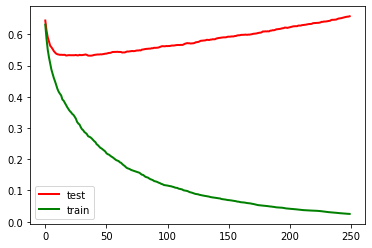

36 0.5314949511258739
Wall time: 15.3 s


In [127]:
%%time

for lr in [0.2]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    clf.fit(X_train, y_train)

    train_loss, train_min_iter, train_min_loss = get_loss(clf, X_train, y_train)
    test_loss, test_min_iter, test_min_loss = get_loss(clf, X_test, y_test)

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()
    print(test_min_iter, test_min_loss)

In [129]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=test_min_iter, random_state=241)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]
rf_loss = log_loss(y_test, y_proba)
print(rf_loss)

0.5415685811957381
